# Load Score Model
## Load Training Data


Load the CSV with Subjective Scores (label/y/dependent variable) and Objective Feature Values (X feature space/ independent variables) 

In [1]:
### Read BerlinTraining Data, please swap the Berlin file with the local file of your collection
import pandas as pd
df= pd.read_csv("Berlin_Data_forTraining/Berlin_Continuous.csv",encoding='utf-8') #, engine='python''gb2312','utf-8'
print(df.shape,df.columns)
df.head(2)

(300, 46) Index(['ID', 'JPG_ID', 'Lat', 'Lng', 'Q1_Text', 'Q1_Type', 'Q2_Order',
       'Q3_Access', 'Q4_Aesth', 'Q5_Eco', 'Q6_Enclo', 'Q7_Richness',
       'Q8_Scale', 'wall', 'building', 'sky', 'tree', 'road', 'sidewalk',
       'grass', 'earth', 'signboard', 'plant', 'fence', 'streetlight',
       'mountain', 'railing', 'column', 'bridge', 'water', 'ashcan', 'awning',
       'windowpane', 'skyscraper', 'ct_person', 'ct_bicycle', 'ct_car',
       'ct_motorcycle', 'ct_truck', 'ct_traffic light', 'ct_bus', 'ct_bench',
       'ct_boat', 'ct_stop sign', 'ct_parking meter', 'ct_dining table'],
      dtype='object')


,ID,JPG_ID,Lat,Lng,Q1_Text,Q1_Type,Q2_Order,Q3_Access,Q4_Aesth,Q5_Eco,...,ct_car,ct_motorcycle,ct_truck,ct_traffic light,ct_bus,ct_bench,ct_boat,ct_stop sign,ct_parking meter,ct_dining table
0,0,0,52.511540,13.305022,Comm,2,0.778286,0.840392,0.599666,0.360809,...,36,1,1,0,0,0,0,0,0,0
1,1,1,52.417602,13.140238,Rural,5,0.480052,0.260063,0.461102,0.611198,...,2,0,0,0,0,0,0,0,0,0


In [2]:
df=df.dropna(how='any')
df.reset_index(drop=True)
print(df.shape)
df.head(3)

(300, 46)


,ID,JPG_ID,Lat,Lng,Q1_Text,Q1_Type,Q2_Order,Q3_Access,Q4_Aesth,Q5_Eco,...,ct_car,ct_motorcycle,ct_truck,ct_traffic light,ct_bus,ct_bench,ct_boat,ct_stop sign,ct_parking meter,ct_dining table
0,0,0,52.511540,13.305022,Comm,2,0.778286,0.840392,0.599666,0.360809,...,36,1,1,0,0,0,0,0,0,0
1,1,1,52.417602,13.140238,Rural,5,0.480052,0.260063,0.461102,0.611198,...,2,0,0,0,0,0,0,0,0,0
2,2,3,52.546342,13.508763,Subur,3,0.457162,0.231712,0.300835,0.334370,...,16,0,1,0,0,0,0,0,0,0


In [6]:
df_Q=df.iloc[:, 6:13]
df_Q.head(2)

,Q2_Order,Q3_Access,Q4_Aesth,Q5_Eco,Q6_Enclo,Q7_Richness,Q8_Scale
0,0.778286,0.840392,0.599666,0.360809,0.578130,0.714419,0.684783
1,0.480052,0.260063,0.461102,0.611198,0.310256,0.130178,0.257246


### Normalization

In [7]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df_Q_Conti=normalize(df_NY_Q)
df_Q_Conti.head(3)
df_Q_Conti.to_csv('ContinualQs.csv', index=False, encoding='utf-8')

In [6]:
# for feature_name in df_NY_Q_Conti.columns:
#     max_value = df_NY_Q_Conti[feature_name].max()
#     min_value = df_NY_Q_Conti[feature_name].min()
#     print(max_value,min_value)

## Cut continous values to categorical

In [7]:
### Read Training Data
import pandas as pd
df= pd.read_csv("Berlin_Continuous.csv",encoding='utf-8') #, engine='python''gb2312','utf-8'
print(df.shape)
df.head(2)

(300, 46)


,ID,JPG_ID,Lat,Lng,Q1_Text,Q1_Type,Q2_Order,Q3_Access,Q4_Aesth,Q5_Eco,...,ct_car,ct_motorcycle,ct_truck,ct_traffic light,ct_bus,ct_bench,ct_boat,ct_stop sign,ct_parking meter,ct_dining table
0,0,0,52.511540,13.305022,Comm,2,0.778286,0.840392,0.599666,0.360809,...,36,1,1,0,0,0,0,0,0,0
1,1,1,52.417602,13.140238,Rural,5,0.480052,0.260063,0.461102,0.611198,...,2,0,0,0,0,0,0,0,0,0


In [8]:
df_Q=df.iloc[:, 6:13]
df_Q.head(2)

,Q2_Order,Q3_Access,Q4_Aesth,Q5_Eco,Q6_Enclo,Q7_Richness,Q8_Scale
0,0.778286,0.840392,0.599666,0.360809,0.578130,0.714419,0.684783
1,0.480052,0.260063,0.461102,0.611198,0.310256,0.130178,0.257246


In [9]:
df_Q_categ=pd.DataFrame()
for column in df_Q.columns:
    category = pd.cut(df_Q[column],bins=[-0.1,0.2,0.4,0.6,0.8,1.1],labels=['L','Mid-L','Mid','Mid-H','H'])
    df_Q_categ.insert(0,column,category)

print(df_Q_categ.shape)
df_Q_categ=df_Q_categ.dropna()
df_Q_categ=df_Q_categ.reset_index(drop=True)
print(df_Q_categ.shape)
df_Q_categ.to_csv('Berlin_Cat_Only.csv', index=False, encoding='utf-8')
df_Q_categ.head(1)

(300, 7)
(300, 7)


,Q8_Scale,Q7_Richness,Q6_Enclo,Q5_Eco,Q4_Aesth,Q3_Access,Q2_Order
0,Mid-H,Mid-H,Mid,Mid-L,Mid,H,Mid-H


In [10]:
for column in df_Q.columns:
    category = pd.cut(df_Q[column],bins=[-1,0.2,0.4,0.6,0.8,1.1],labels=[1,2,3,4,5])
    df[column]=category
df.to_csv('Berlin_Categories.csv', index=False, encoding='utf-8')

### Summarize the data

In [11]:
# dfsum=df.describe()
# dfsum
# #dfsum.to_csv("CaseStudy/ShanghaiSampleSummary.csv", index=False, encoding='utf-8')

### Lookinto the data structure

In [12]:
df.head(3)

,ID,JPG_ID,Lat,Lng,Q1_Text,Q1_Type,Q2_Order,Q3_Access,Q4_Aesth,Q5_Eco,...,ct_car,ct_motorcycle,ct_truck,ct_traffic light,ct_bus,ct_bench,ct_boat,ct_stop sign,ct_parking meter,ct_dining table
0,0,0,52.511540,13.305022,Comm,2,4,5,3,2,...,36,1,1,0,0,0,0,0,0,0
1,1,1,52.417602,13.140238,Rural,5,3,2,3,4,...,2,0,0,0,0,0,0,0,0,0
2,2,3,52.546342,13.508763,Subur,3,3,2,2,2,...,16,0,1,0,0,0,0,0,0,0


In [13]:
### Lookinto the data structure
df_NY=df.copy()
df_NY=df_NY.dropna(how='any') # drop Nan
df_NY_I=df_NY.iloc[:,:4]
df_NY_PSP=df_NY.iloc[:,13:-12]
df_NY_CNN=df_NY.iloc[:,-12:]

for i in [df_NY_I,df_NY_Q,df_NY_PSP,df_NY_CNN]:
    print(i.shape,i.columns)

(300, 4) Index(['ID', 'JPG_ID', 'Lat', 'Lng'], dtype='object')
(300, 7) Index(['Q2_Order', 'Q3_Access', 'Q4_Aesth', 'Q5_Eco', 'Q6_Enclo',
       'Q7_Richness', 'Q8_Scale'],
      dtype='object')
(300, 21) Index(['wall', 'building', 'sky', 'tree', 'road', 'sidewalk', 'grass', 'earth',
       'signboard', 'plant', 'fence', 'streetlight', 'mountain', 'railing',
       'column', 'bridge', 'water', 'ashcan', 'awning', 'windowpane',
       'skyscraper'],
      dtype='object')
(300, 12) Index(['ct_person', 'ct_bicycle', 'ct_car', 'ct_motorcycle', 'ct_truck',
       'ct_traffic light', 'ct_bus', 'ct_bench', 'ct_boat', 'ct_stop sign',
       'ct_parking meter', 'ct_dining table'],
      dtype='object')


# Load the data we want to make predictions

In [14]:
import pandas as pd
df_SF= pd.read_csv("SH_2K_Sample.csv",encoding='utf-8', engine='python') #'gb2312','utf-8'
print(df_SF.shape)
print(df_SF.columns)
df_SF.head(3)

(2000, 39)
Index(['FID', 'Lat_wgs', 'Lng_wgs', 'ashcan', 'awning', 'bicycle', 'booth',
       'bridge', 'building', 'bulletin board', 'car', 'ceiling', 'chair',
       'column', 'earth', 'fence', 'fountain', 'grass', 'lake', 'lamp',
       'minibike', 'mountain', 'person', 'pier', 'plant', 'railing', 'road',
       'sculpture', 'sidewalk', 'signboard', 'sky', 'skyscraper', 'sofa',
       'streetlight', 'tree', 'van', 'wall', 'water', 'windowpane'],
      dtype='object')


,FID,Lat_wgs,Lng_wgs,ashcan,awning,bicycle,booth,bridge,building,bulletin board,...,signboard,sky,skyscraper,sofa,streetlight,tree,van,wall,water,windowpane
0,2177,31.214364,121.371881,0.0,0.0,0.000000,0.0,0.0,0.304345,0.0,...,0.002509,0.285074,0.0,NaN,0.000000,0.150152,0.0,0.000000,0.0,0.0
1,17107,31.200603,121.649801,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.122678,0.0,0.0,0.002504,0.201228,0.0,0.015243,0.0,0.0
2,15609,31.173051,121.634467,0.0,0.0,0.001102,0.0,0.0,0.460877,0.0,...,0.000582,0.299175,0.0,0.0,0.001089,0.087005,0.0,0.007266,0.0,0.0


In [15]:
# df_SF=df_SF.sample(2000).reset_index(drop=True)

In [16]:
df_SF=df_SF.rename(columns={"Lat_wgs": "Lat", "Lng_wgs": "Lng"})
df_SF.head(3)
# df_SF.to_csv("SH_2K_Sample.csv", index=False, encoding='utf-8')

,FID,Lat,Lng,ashcan,awning,bicycle,booth,bridge,building,bulletin board,...,signboard,sky,skyscraper,sofa,streetlight,tree,van,wall,water,windowpane
0,2177,31.214364,121.371881,0.0,0.0,0.000000,0.0,0.0,0.304345,0.0,...,0.002509,0.285074,0.0,NaN,0.000000,0.150152,0.0,0.000000,0.0,0.0
1,17107,31.200603,121.649801,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.122678,0.0,0.0,0.002504,0.201228,0.0,0.015243,0.0,0.0
2,15609,31.173051,121.634467,0.0,0.0,0.001102,0.0,0.0,0.460877,0.0,...,0.000582,0.299175,0.0,0.0,0.001089,0.087005,0.0,0.007266,0.0,0.0


In [17]:
# ### Reorder Prediction Dataframe by columns' name, and Overwrite it
# df_SF=df_SF.reindex(sorted(df_SF.columns), axis=1)
# print(df_SF.columns)
# print(df_SF.shape)
# df_SF.to_csv("SH_2K_Sample.csv", index=False, encoding='utf-8')
# df_SF.head(1)

## Make sure the training data and prediction data have same variables

In [18]:
### Split PSPNET result for Prediction Overall Score as xPRE
df_SF_PSP=df_SF.iloc[:, 9:]
print(df_SF_PSP.columns)
print('Will predict based on %s dimensions of features'%(df_SF_PSP.shape[1]))
print('Will predict based on %s dimensions of features'%(df_NY_PSP.shape[1]))

Index(['bulletin board', 'car', 'ceiling', 'chair', 'column', 'earth', 'fence',
       'fountain', 'grass', 'lake', 'lamp', 'minibike', 'mountain', 'person',
       'pier', 'plant', 'railing', 'road', 'sculpture', 'sidewalk',
       'signboard', 'sky', 'skyscraper', 'sofa', 'streetlight', 'tree', 'van',
       'wall', 'water', 'windowpane'],
      dtype='object')
Will predict based on 30 dimensions of features
Will predict based on 21 dimensions of features


In [19]:
### 0.Get the columns for Analysis in consistent order for both Training data and Prediction data
Diff=[]
for col_name in df_SF.columns:
    if col_name not in df_NY_PSP.columns:
        Diff.append(col_name)

print('Different columns are %s'%(Diff),'\n') 
reindex_columns=list(set(df_SF.columns)-set(Diff))
reindex_columns.sort()

print("Selected columns:",len(reindex_columns),reindex_columns,'\n')

### 1.Split PSPNET result from Prediction Data as df_SF_PSP
df_SF_PSP = df_SF[reindex_columns]

### 2.Split PSPNET result from Training Data as df_SH_PSP
df_NY_PSP = df_NY_PSP[reindex_columns]
#print(df_NY_PSP.columns)

print("Reshape xTr to %s, and xPre to %s dimensions"%(len(df_NY_PSP.columns),len(df_SF_PSP.columns)),'\n')

if df_NY_PSP.columns.all() == df_SF_PSP.columns.all():
    print("Dimensions for Traning and Prediction Dataset are Matched")

Different columns are ['FID', 'Lat', 'Lng', 'bicycle', 'booth', 'bulletin board', 'car', 'ceiling', 'chair', 'fountain', 'lake', 'lamp', 'minibike', 'person', 'pier', 'sculpture', 'sofa', 'van'] 

Selected columns: 21 ['ashcan', 'awning', 'bridge', 'building', 'column', 'earth', 'fence', 'grass', 'mountain', 'plant', 'railing', 'road', 'sidewalk', 'signboard', 'sky', 'skyscraper', 'streetlight', 'tree', 'wall', 'water', 'windowpane'] 

Reshape xTr to 21, and xPre to 21 dimensions 

Dimensions for Traning and Prediction Dataset are Matched


In [20]:
df_NY_Q.sample(3)

,Q2_Order,Q3_Access,Q4_Aesth,Q5_Eco,Q6_Enclo,Q7_Richness,Q8_Scale
285,0.627534,0.861043,0.568614,0.311042,0.823358,0.582062,0.509552
165,0.703401,0.647882,0.410684,0.310109,0.730831,0.511679,0.849473
255,0.430347,0.794890,0.711519,0.560187,0.668716,0.870134,0.816864


In [21]:
# df_NY_Q_categ.sample(3)

# 1. Train/Test Data Split

In [22]:
### Divide data for training & testing on SafetyScore
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

X = df_NY_PSP.values  
Y = df_NY_Q.iloc[:,2].values #Safety Score

xTr, xTe, yTr, yTe = train_test_split(X, Y, test_size=0.20)
# xTr-yTr, xTe-yTe, y=beta*x
print(xTr.shape,xTe.shape,yTr.shape,yTe.shape)

(240, 21) (60, 21) (240,) (60,)


# Sklearn classifiers 
### Predict categorical label

In [23]:
# ### Divide data for training & testing on Question 2-8
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import matplotlib.pyplot as plt
# from sklearn import metrics

# df_result=pd.DataFrame()

# for i in range(len(df_NY_Q_categ.columns))[1:]:
#     X = df_NY_PSP.values  
#     Y = df_NY_Q_categ.iloc[:,i].values #Safety Score
#     xTr, xTe, yTr, yTe = train_test_split(X, Y, test_size=0.20)
#     yTr,yTe=(yTr.ravel(),yTe.ravel())
#     print("***",df_NY_Q.columns[i],xTr.shape,xTe.shape,type(yTr))

#     ### KNN
#     from sklearn.neighbors import KNeighborsClassifier
#     k=10
#     KNN=KNeighborsClassifier(n_neighbors=k).fit(xTr, yTr) #n_neighbors=k
#     print(KNN.score(xTr,yTr)) # mean accuracy on the given test data and labels
#     yPr=KNN.predict(xTe)
#     acc=metrics.accuracy_score(yTe, yPr)
#     print("Accuracy: %s | KNN"%(acc),'\n') # SVM_Reg.get_params
#     df_result.loc[i,'KNN_Accuracy']=acc

#     ### Random Forest
#     from sklearn.ensemble import RandomForestClassifier
#     RandomForest = RandomForestClassifier().fit(xTr,yTr)
#     print(RandomForest.score(xTr,yTr))
#     yPr=RandomForest.predict(xTe)
#     acc=metrics.accuracy_score(yTe, yPr)
#     print("Accuracy: %s | RF"%(acc),'\n')
#     df_result.loc[i,'RF_Accuracy']=acc

#     ### Decision Tree
#     from sklearn.tree import DecisionTreeClassifier
#     DecisionTree= DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=10).fit(xTr, yTr)
#     print(DecisionTree.score(xTr,yTr))
#     yPr=DecisionTree.predict(xTe)
#     acc=metrics.accuracy_score(yTe, yPr)
#     print("Accuracy: %s | DT"%(acc),'\n') # SVM_Reg.get_params
#     df_result.loc[i,'DT_Accuracy']=acc

#     ### Gaussian Process
#     from sklearn.gaussian_process import GaussianProcessClassifier
#     from sklearn.gaussian_process.kernels import DotProduct,WhiteKernel
#     kernel = DotProduct() + WhiteKernel()
#     gpr = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(xTr, yTr)
#     print(gpr.score(xTr, yTr))
#     yPr=gpr.predict(xTe)
#     acc=metrics.accuracy_score(yTe, yPr)
#     print("Accuracy: %s | GP"%(acc),'\n') # SVM_Reg.get_params
#     df_result.loc[i,'GP_Accuracy']=acc

#     # GradientBoosting Regression; To use this experimental feature, we need to explicitly ask for it:
#     from sklearn.experimental import enable_hist_gradient_boosting  # noqa
#     from sklearn.ensemble import HistGradientBoostingClassifier
#     from sklearn.datasets import load_boston
#     est = HistGradientBoostingClassifier().fit(xTr,yTr)
#     print(est.score(xTr,yTr))
#     yPr=est.predict(xTe)
#     acc=metrics.accuracy_score(yTe, yPr)
#     print("Accuracy: %s | GR"%(acc),'\n') # SVM_Reg.get_params
#     df_result.loc[i,'GR_Accuracy']=acc

#     # ADA Boost Regression
#     from sklearn.ensemble import AdaBoostClassifier
#     adaBst = AdaBoostClassifier(random_state=0, n_estimators=100).fit(xTr,yTr)
#     adaBst.feature_importances_
#     print(adaBst.score(xTr,yTr))
#     yPr=adaBst.predict(xTe)
#     acc=metrics.accuracy_score(yTe, yPr)
#     print("Accuracy: %s | AB"%(acc),'\n') # SVM_Reg.get_params
#     df_result.loc[i,'AB_Accuracy']=acc

#     # BagingRegressor
#     from sklearn.svm import SVR
#     from sklearn.ensemble import BaggingClassifier
#     regr = BaggingClassifier(base_estimator=SVR(),n_estimators=10, random_state=0).fit(xTr, yTr)
#     yPr=adaBst.predict(xTe)
#     acc=metrics.accuracy_score(yTe, yPr)
#     print("Accuracy: %s | BR"%(acc),'\n') # SVM_Reg.get_params
#     df_result.loc[i,'BR_Accuracy']=acc

# Sklearn regressors
### Predict continuous label

In [24]:
df_NY_Q.columns

Index(['Q2_Order', 'Q3_Access', 'Q4_Aesth', 'Q5_Eco', 'Q6_Enclo',
       'Q7_Richness', 'Q8_Scale'],
      dtype='object')

In [28]:
### Divide data for training & testing on Question 2-8
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pickle
df_result=pd.DataFrame()

for i in range(len(df_NY_Q.columns))[0:]:
    tag=str(i)
    print (df_NY_Q.columns[i])
    
    X = df_NY_PSP.values  
    Y = df_NY_Q.iloc[:,i].values #Safety Score
    xTr, xTe, yTr, yTe = train_test_split(X, Y, test_size=0.20)
    yTr,yTe=(yTr.ravel(),yTe.ravel())
    print(xTr.shape,xTe.shape)
    print(type(yTr))

    #KNN
    from sklearn.neighbors import KNeighborsRegressor
    KNN=KNeighborsRegressor().fit(xTr, yTr) #n_neighbors=2
    yPr=KNN.predict(xTe)
    filename = tag+'_model_KNN.sav'
    pickle.dump(KNN, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s | KNN"%(r2,rmse,mae),'\n') # SVM_Reg.get_params
    df_result.loc[i,'KNN_R2']=r2
    df_result.loc[i,'KNN_RMSE']=rmse
    df_result.loc[i,'KNN_MAE']=mae

    #SVM
    from sklearn.svm import SVR
    SVM_Reg = SVR().fit(xTr,yTr)
    yPr=SVM_Reg.predict(xTe)
    filename = tag+'_model_SVM.sav'
    pickle.dump(SVM_Reg, open(filename, 'wb'))

    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s | SVM"%(r2,rmse,mae),'\n') # SVM_Reg.get_params
    df_result.loc[i,'SVM_R2']=r2
    df_result.loc[i,'SVM_RMSE']=rmse
    df_result.loc[i,'SVM_MAE']=mae

    #Random Forest
    from sklearn.ensemble import RandomForestRegressor
    RandomForest = RandomForestRegressor().fit(xTr,yTr)
    yPr=RandomForest.predict(xTe)
    filename = tag+'_model_RandomForest.sav'
    pickle.dump(RandomForest, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s | Random Forest"%(r2,rmse,mae),'\n')
    df_result.loc[i,'RF_R2']=r2
    df_result.loc[i,'RF_RMSE']=rmse
    df_result.loc[i,'RF_MAE']=mae

    #Decision Tree
    from sklearn.tree import DecisionTreeRegressor
    DecisionTree= DecisionTreeRegressor(criterion='mae',max_depth=2,random_state=10).fit(xTr, yTr)
    yPr=DecisionTree.predict(xTe)
    filename = tag+'_model_DecisionForest.sav'
    pickle.dump(DecisionTree, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s | Decision Tree"%(r2,rmse,mae),'\n')
    df_result.loc[i,'DTree_R2']=r2
    df_result.loc[i,'DTree_RMSE']=rmse
    df_result.loc[i,'DTree_MAE']=mae

    #Linear Regression
    from sklearn.linear_model import LinearRegression
    lireg = LinearRegression(normalize=True).fit(xTr, yTr)
    yPr=lireg.predict(xTe)
    filename = tag+'_model_LinearRegression.sav'
    pickle.dump(lireg, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s | OLS"%(r2,rmse,mae),'\n')
    df_result.loc[i,'LR_R2']=r2
    df_result.loc[i,'LR_RMSE']=rmse
    df_result.loc[i,'LR_MAE']=mae

    #Gaussian Process
    from sklearn.gaussian_process import GaussianProcessRegressor
    from sklearn.gaussian_process.kernels import DotProduct,WhiteKernel
    kernel = DotProduct() + WhiteKernel()
    gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(xTr, yTr)
    gpr.score(xTr, yTr)
    yPr=gpr.predict(xTe, return_std=True)
    yPr=yPr[0]
    filename = tag+'_model_Gaussian_Process.sav'
    pickle.dump(gpr, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s | Gaussian"%(r2,rmse,mae),'\n')
    df_result.loc[i,'Gaus_R2']=r2
    df_result.loc[i,'Gaus_RMSE']=rmse
    df_result.loc[i,'Gaus_MAE']=mae

    #Voting Selection
    from sklearn.ensemble import VotingRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import VotingRegressor
    
    r1 = LinearRegression()
    r2 = RandomForestRegressor(n_estimators=10, random_state=1)
    er = VotingRegressor([('lr', r1), ('rf', r2)]).fit(xTr, yTr)
    yPr=er.predict(xTe)
    filename = tag+'_model_Voting_Selection.sav'
    pickle.dump(er, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s | Voting Selection"%(r2,rmse,mae),'\n')
    df_result.loc[i,'VtSel_R2']=r2
    df_result.loc[i,'VtSel_RMSE']=rmse
    df_result.loc[i,'VtSel_MAE']=mae

    # GradientBoosting Regression; To use this experimental feature, we need to explicitly ask for it:
    from sklearn.experimental import enable_hist_gradient_boosting  # noqa
    from sklearn.ensemble import HistGradientBoostingRegressor
    from sklearn.datasets import load_boston
    est = HistGradientBoostingRegressor().fit(xTr,yTr)
    yPr=est.predict(xTe)
    #print(est.score(xTr, yTr))
    filename = tag+'_model_GradientBoosting_Regression.sav'
    pickle.dump(est, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s |GradientBoosting"%(r2,rmse,mae),'\n')
    df_result.loc[i,'GB_R2']=r2
    df_result.loc[i,'GB_RMSE']=rmse
    df_result.loc[i,'GB_MAE']=mae

    # ADA Boost Regression
    from sklearn.ensemble import AdaBoostRegressor
    adaBst = AdaBoostRegressor(random_state=0, n_estimators=100).fit(xTr,yTr)
    #adaBst.feature_importances_
    yPr=adaBst.predict(xTe)
    filename = tag+'_model_ADABoosting_Regression.sav'
    pickle.dump(adaBst, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s |ADA Boost"%(r2,rmse,mae),'\n')
    df_result.loc[i,'AB_R2']=r2
    df_result.loc[i,'AB_RMSE']=rmse
    df_result.loc[i,'AB_MAE']=mae

    # BagingRegressor
    from sklearn.svm import SVR
    from sklearn.ensemble import BaggingRegressor
    regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(xTr, yTr)
    yPr=regr.predict(xTe)
    filename = tag+'_model_BagingRegressor.sav'
    pickle.dump(regr, open(filename, 'wb'))
    
    r2=round(r2_score(yTe,yPr),2)
    rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
    mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
    print("R2:%s, RMSE:%s, MAE:%s |Bagging Regression"%(r2,rmse,mae),'\n')
    df_result.loc[i,'BR_R2']=r2
    df_result.loc[i,'BR_RMSE']=rmse
    df_result.loc[i,'BR_MAE']=mae

Q2_Order
(240, 21) (60, 21)
<class 'numpy.ndarray'>
R2:0.03, RMSE:0.2, MAE:0.16 | KNN 

R2:0.17, RMSE:0.19, MAE:0.15 | SVM 

R2:0.11, RMSE:0.2, MAE:0.15 | Random Forest 

R2:0.11, RMSE:0.19, MAE:0.15 | Decision Tree 

R2:-1.36, RMSE:0.32, MAE:0.19 | OLS 

R2:0.23, RMSE:0.18, MAE:0.14 | Gaussian 

R2:-0.22, RMSE:0.23, MAE:0.16 | Voting Selection 

R2:0.07, RMSE:0.2, MAE:0.16 |GradientBoosting 

R2:0.19, RMSE:0.19, MAE:0.14 |ADA Boost 

R2:0.19, RMSE:0.19, MAE:0.15 |Bagging Regression 

Q3_Access
(240, 21) (60, 21)
<class 'numpy.ndarray'>
R2:-0.0, RMSE:0.23, MAE:0.18 | KNN 

R2:0.35, RMSE:0.18, MAE:0.14 | SVM 

R2:0.31, RMSE:0.19, MAE:0.15 | Random Forest 

R2:0.18, RMSE:0.21, MAE:0.17 | Decision Tree 

R2:0.4, RMSE:0.18, MAE:0.14 | OLS 

R2:0.36, RMSE:0.18, MAE:0.15 | Gaussian 

R2:0.39, RMSE:0.18, MAE:0.14 | Voting Selection 

R2:0.35, RMSE:0.18, MAE:0.15 |GradientBoosting 

R2:0.3, RMSE:0.19, MAE:0.16 |ADA Boost 

R2:0.35, RMSE:0.18, MAE:0.14 |Bagging Regression 

Q4_Aesth
(240, 21) (

In [27]:
df_result.to_csv('Example_ModelSelection_Continuous.csv', index=False, encoding='utf-8')
df_result

,KNN_R2,KNN_RMSE,KNN_MAE,SVM_R2,SVM_RMSE,SVM_MAE,RF_R2,RF_RMSE,RF_MAE,DTree_R2,...,VtSel_MAE,GB_R2,GB_RMSE,GB_MAE,AB_R2,AB_RMSE,AB_MAE,BR_R2,BR_RMSE,BR_MAE
0,0.11,0.19,0.15,0.12,0.19,0.16,0.02,0.20,0.16,0.01,...,0.16,0.02,0.20,0.15,0.01,0.20,0.15,0.11,0.19,0.16
1,-0.33,0.21,0.18,0.11,0.17,0.14,0.13,0.17,0.13,-0.05,...,0.14,-0.07,0.19,0.15,0.11,0.17,0.14,0.12,0.17,0.14
2,0.17,0.17,0.14,0.33,0.15,0.12,0.34,0.15,0.12,0.22,...,0.13,0.37,0.14,0.12,0.31,0.15,0.12,0.33,0.15,0.12
3,0.27,0.19,0.16,0.43,0.17,0.14,0.46,0.16,0.14,0.24,...,0.13,0.51,0.15,0.12,0.43,0.17,0.14,0.40,0.17,0.14
4,0.46,0.15,0.13,0.47,0.15,0.12,0.46,0.15,0.12,0.33,...,0.13,0.47,0.15,0.12,0.51,0.15,0.12,0.47,0.15,0.12
5,0.05,0.15,0.12,0.31,0.13,0.10,0.19,0.14,0.11,-0.01,...,0.12,-0.11,0.16,0.14,0.17,0.14,0.11,0.33,0.13,0.10
6,0.07,0.19,0.16,0.25,0.17,0.14,0.24,0.17,0.14,0.07,...,0.13,0.24,0.17,0.14,0.22,0.17,0.14,0.27,0.17,0.14


# Apply the Best Model to the Data for Prediction

In [115]:
print(df_NY_Q.columns)

Index(['Q2_Order', 'Q3_Access', 'Q4_Aesth', 'Q5_Eco', 'Q6_Enclo',
       'Q7_Richness', 'Q8_Scale'],
      dtype='object')


In [1]:
# Q2
X = df_NY_PSP.values  
Y = df_NY_Q.iloc[:,6].values #Safety Score
xTr, xTe, yTr, yTe = train_test_split(X, Y, test_size=0.20)
yTr,yTe=(yTr.ravel(),yTe.ravel())
print(("xTr%s,xTe%s,Type yTr%s")%(xTr.shape,xTe.shape,type(yTr)))

### Set up Prediction data xPre
xPre=df_SF_PSP.values
print("xPre%s"%str(xPre.shape))

### Make Prediction Based on Best Fit Model Selection
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor().fit(xTr,yTr)
yPr=RandomForest.predict(xTe)

r2=round(r2_score(yTe,yPr),2)
rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
print("R2:%s, RMSE:%s, MAE:%s | Random Forest"%(r2,rmse,mae),'\n')

yPre=RandomForest.predict(xPre) #Q1_Type
### Add the prediction to Shanghai Dataframe
yPre_List=list(yPre)
column_values = pd.Series(yPre_List)
#df_SF=df_SF.drop(columns='Q5_Eco')
df_SF.insert(loc=3, column='Q8_Scale', value=column_values)

print(df_SF.columns,df_SF.shape)
df_SF.head(1)

NameError: name 'df_NY_PSP' is not defined

In [125]:
%matplotlib inline

# Visualize the Prediction Results

In [142]:
### 2. Plot the map with street view images sample points
import folium

In [143]:
#2.1 Get the center point of our sample locations as the center of the map
Center = [df_SF['Lat'].mean(),df_SF['Lng'].mean()]
print(Center)

[31.2196313335, 121.5843346985]


In [144]:


# 2.1.1 Create Color band
import branca.colormap as cm
clr=['green', 'yellow', 'red']
linear = cm.LinearColormap(clr,vmin=0, vmax=1) # Change the value domain here
linear

In [145]:
df_SF.head(3)

,FID,Lat,Lng,Q8_Scale,Q7_Richness,Q6_Enclo,Q5_Eco,Q4_Aesth,Q3_Access,Q2_Order,...,signboard,sky,skyscraper,sofa,streetlight,tree,van,wall,water,windowpane
0,2177,31.214364,121.371881,0.555517,0.498866,0.432766,0.486992,0.495402,0.571054,0.503663,...,0.002509,0.285074,0.0,NaN,0.000000,0.150152,0.0,0.000000,0.0,0.0
1,17107,31.200603,121.649801,0.600066,0.457110,0.544144,0.695739,0.599209,0.513318,0.495245,...,0.000000,0.122678,0.0,0.0,0.002504,0.201228,0.0,0.015243,0.0,0.0
2,15609,31.173051,121.634467,0.581037,0.541529,0.455357,0.390547,0.484234,0.580168,0.543715,...,0.000582,0.299175,0.0,0.0,0.001089,0.087005,0.0,0.007266,0.0,0.0


In [151]:
# 2.2 creating a basemap that’s centered to our sample, defining styles, and zoom in scale
map0 = folium.Map(location=Center,tiles='openstreetmap',zoom_start=12)

# 2.3 Paint the dataframe data with dots on the map
# To save time, we subsample 500 random pts from the 1500 as a new datafram
df1=df_SF.sample(1000)
print(len(df1))

# Read the Lat and Lng and paint with color
for index, row in df_SF.iterrows():
    folium.CircleMarker([row['Lat'], row['Lng']],radius=2,fill=True,
                        color=linear(row['Q5_Eco']),opacity=0.8,
                        fill_color=linear(row['Q5_Eco']),fill_opacity=0.8,
                        ).add_to(map0)  

# Display the map
map0

1000


# Feature Importance

R2:0.09, RMSE:0.19, MAE:0.15 |Random Forest 

  ExtTree_Feature  ExtTree_Score  ExtTree_Sort
0          awning       0.000990          19.0
1        mountain       0.002077          18.0
2          bridge       0.003734          17.0


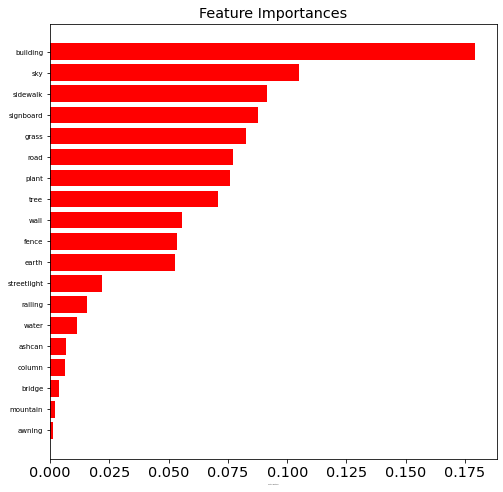

In [84]:
#Random Forest
RandomForest = RandomForestRegressor().fit(xTr,yTr)
yPr=RandomForest.predict(xTe)

r2=round(r2_score(yTe,yPr),2)
rmse=round(np.sqrt(np.sum((yPr-yTe)**2)/len(yPr)),2)
mae=round(np.sum(np.sqrt((yPr-yTe)**2))/len(yPr),2)
print("R2:%s, RMSE:%s, MAE:%s |Random Forest"%(r2,rmse,mae),'\n')

IMPT = RandomForest.feature_importances_
RANK = np.argsort(IMPT)
FEATURES=df_NY_PSP.columns
Tree_Imprtnc= pd.DataFrame()

for i in range(len(RANK)):    
    Tree_Imprtnc.loc[i,'ExtTree_Feature']=FEATURES[RANK[i]]
    Tree_Imprtnc.loc[i,'ExtTree_Score']=IMPT[RANK[i]]
    Tree_Imprtnc.loc[i,'ExtTree_Sort']=len(RANK)-i
print(Tree_Imprtnc.head(3))
Tree_Imprtnc.to_csv('Importance_Safety.csv', index=False, encoding='utf-8')

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-small'} 
# Size options: xx-small,x-small,small,medium,large,x-large,xx-large
pylab.rcParams.update(params)

plt.title('Feature Importances')
plt.barh(range(len(RANK)), IMPT[RANK], color='red', align='center')
plt.yticks(range(len(RANK)), [FEATURES[i] for i in RANK])
plt.xlabel('Relative Importance',fontsize=0.01)
plt.show()

# Linear Regression

In [85]:
print(df_NY_PSP.columns)

Index(['ashcan', 'awning', 'bridge', 'building', 'column', 'earth', 'fence',
       'grass', 'mountain', 'plant', 'railing', 'road', 'sidewalk',
       'signboard', 'sky', 'streetlight', 'tree', 'wall', 'water'],
      dtype='object')


In [86]:
### 6.3 Run the regression
X=['building+sky+grass+road+tree+fence+signboard+sidewalk+plant+earth+wall+streetlight']

import statsmodels.formula.api as sm
result = sm.ols(formula="Q2_Order"+"~"+X[0], data=df).fit()
print(result.summary())

ModuleNotFoundError: No module named 'statsmodels'